****Input all the neccessay packages****

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import time
from contextlib import contextmanager

In [32]:
churn_data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [33]:
churn_data.info() # NAN value bulunmamaktadir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber, Customer ID and Surname degiskenlerini drop ediyoruz, bu degiskenlerin isimize yaramayacagini dusunduk

In [35]:
churn_data.drop(labels=['RowNumber','CustomerId','Surname'],
                axis=1,
                inplace=True)

In [36]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
categorical_features = ["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]

numerical_features = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

target = "Exited"

In [38]:
churn_data[numerical_features].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


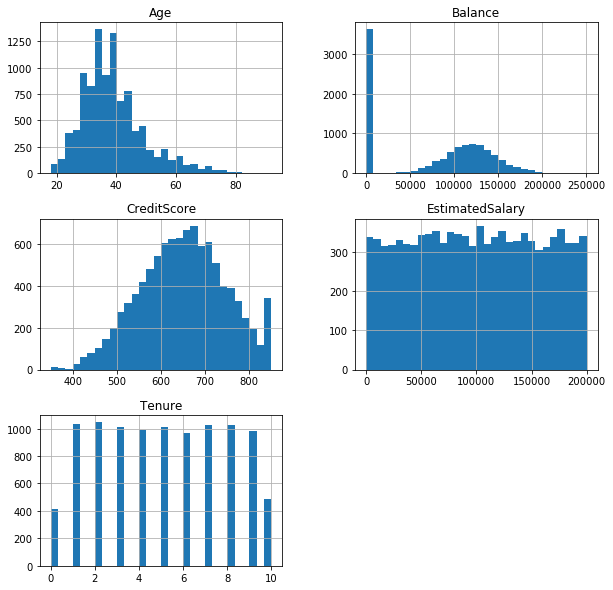

In [39]:
churn_data[numerical_features].hist(bins=30, figsize=(10, 10));

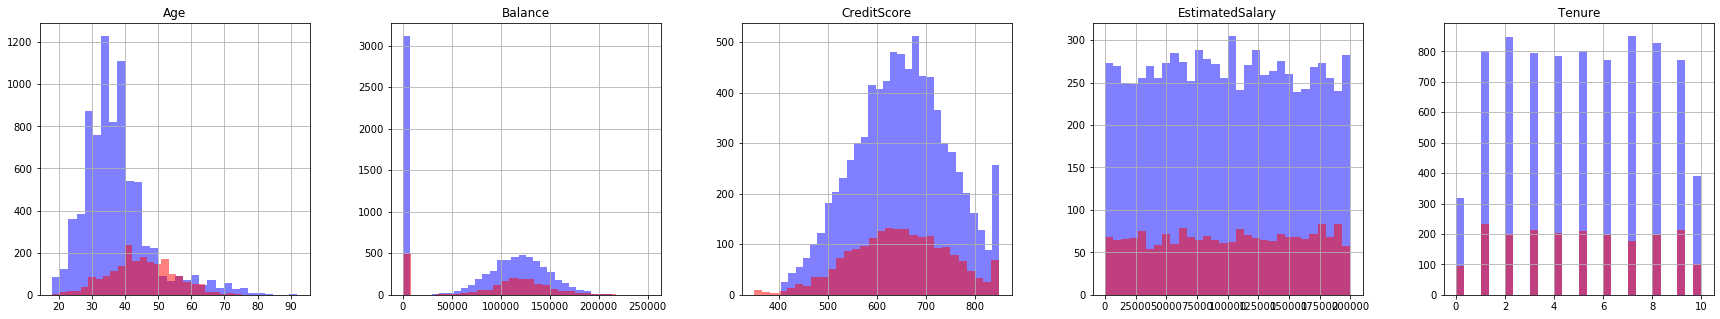

In [40]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))
churn_data[churn_data.Exited == 0][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax);
churn_data[churn_data.Exited == 1][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax);

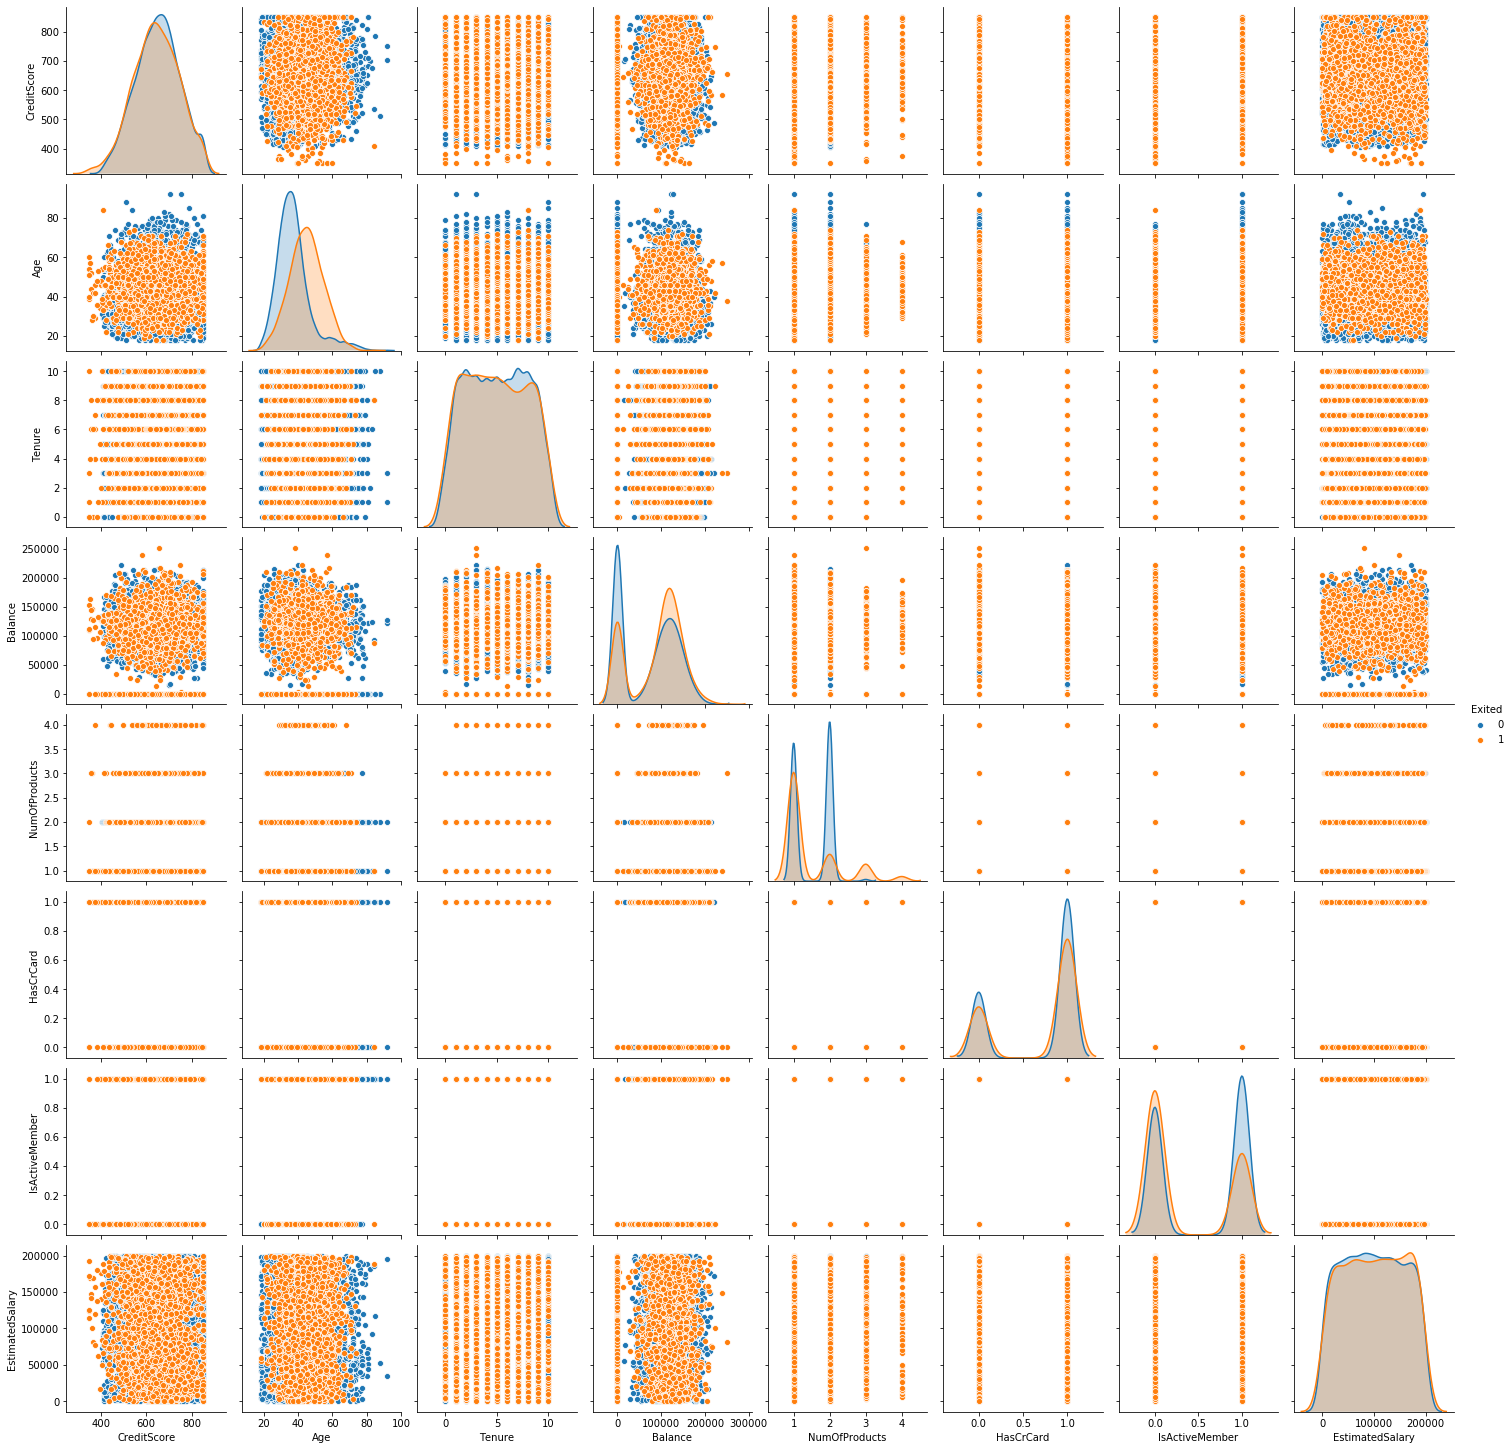

In [41]:
g = sns.pairplot(churn_data,hue = 'Exited')

Kategorik degiskenlere one hot encoding uyguluyoruz

In [42]:
churn_data_cleaned = pd.get_dummies(churn_data,
                                    prefix_sep='_', 
                                    columns=categorical_features,
                                    drop_first=True,
                                    dtype=int)

In [43]:
churn_data_cleaned.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,0,0,0,0,0,0,1,1
1,608,41,1,83807.86,112542.58,0,0,1,0,0,0,0,0,1
2,502,42,8,159660.80,113931.57,1,0,0,0,0,1,0,1,0
3,699,39,1,0.00,93826.63,0,0,0,0,1,0,0,0,0
4,850,43,2,125510.82,79084.10,0,0,1,0,0,0,0,1,1


In [44]:
churn_data_cleaned[numerical_features].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(churn_data_cleaned[numerical_features])

In [46]:
churn_data_cleaned[numerical_features] = data_scaled

In [47]:
churn_data_cleaned.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,0.506735,1,0,0,0,0,0,0,1,1
1,0.516,0.310811,0.1,0.334031,0.562709,0,0,1,0,0,0,0,0,1
2,0.304,0.324324,0.8,0.636357,0.569654,1,0,0,0,0,1,0,1,0
3,0.698,0.283784,0.1,0.000000,0.469120,0,0,0,0,1,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.395400,0,0,1,0,0,0,0,1,1


**MACHINE LEARNING**

In [48]:
df = churn_data_cleaned
X = df.drop(['Exited'], axis=1)
y = df["Exited"]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [49]:
names = ["LogisticRegression","GaussianNB","KNeighborsClassifier","LinearSVC","SVC",
         "DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier",
         "XGBClassifier","LGBMClassifier","CatBoostClassifier"]
    
    
classifiers = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), LinearSVC(), SVC(),
               DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(),
               XGBClassifier(), LGBMClassifier(), CatBoostClassifier(verbose = False)]

In [50]:
for name, clf in zip(names, classifiers):
    
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = "%s: %f" % (name, acc)
    print(msg)

LogisticRegression: 0.842500
GaussianNB: 0.822000
KNeighborsClassifier: 0.821000
LinearSVC: 0.844500
SVC: 0.859000
DecisionTreeClassifier: 0.785500
RandomForestClassifier: 0.865500
GradientBoostingClassifier: 0.866000
XGBClassifier: 0.852500
LGBMClassifier: 0.864000
CatBoostClassifier: 0.861500


In [51]:
results = []
A = []

for name, clf in zip(names, classifiers):
        
    kfold = KFold(n_splits=10, random_state=1001)
    cv_results = cross_val_score(clf, X, y, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    A.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean() , cv_results.std())
    print(msg)

LogisticRegression: 0.840500 (0.009821)
GaussianNB: 0.819700 (0.009665)
KNeighborsClassifier: 0.825200 (0.007040)
LinearSVC: 0.837900 (0.009710)
SVC: 0.850900 (0.008960)
DecisionTreeClassifier: 0.793000 (0.013799)
RandomForestClassifier: 0.863100 (0.009428)
GradientBoostingClassifier: 0.863100 (0.008300)
XGBClassifier: 0.857200 (0.006416)
LGBMClassifier: 0.861200 (0.010543)
CatBoostClassifier: 0.864200 (0.007111)


In [52]:
cv_result = {}
best_estimators = {}
best_params = {}
    
clf = GridSearchCV(RandomForestClassifier(), 
                   param_grid = {"max_features": ["log2","Auto","None"],
                 "min_samples_split":[2,3,5],
                 "min_samples_leaf":[1,3,5],
                 "bootstrap":[True,False],
                 "n_estimators":[50,100,150],
                 "criterion":["gini","entropy"]},
                   cv =10, scoring = "accuracy", 
                   n_jobs = -1, 
                   verbose = False)

clf.fit(X_train,y_train)
cv_result = clf.best_score_
best_estimators = clf.best_estimator_
best_params = clf.best_params_

In [53]:
print('cross validation accuracy : %.3f'%cv_result)
print(best_estimators)
print(best_params)

cross validation accuracy : 0.865
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 150}


In [54]:
y_pred =  best_estimators.fit(X_train,y_train).predict(X_test)

accuracy=accuracy_score(y_pred, y_test)

print('accuracy score :', "%.3f" %accuracy)

accuracy score : 0.869


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1528,  196],
       [  67,  209]])

In [56]:
from sklearn.metrics import precision_score
precision_score(y_pred, y_test)

0.5160493827160494

In [57]:
from sklearn.metrics import f1_score
f1_score(y_pred, y_test)

0.6138032305433188

In [58]:
from sklearn.metrics import roc_auc_score
auc_RF = roc_auc_score(y_pred, y_test)
auc_LR = roc_auc_score(y_pred, y_test)
print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

AUC RF:0.822
AUC LR:0.822


In [59]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_pred, y_test)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95799373 0.51604938]
recall: [0.8863109  0.75724638]
fscore: [0.92075926 0.61380323]
support: [1724  276]
